In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
stock_list = [6.5, 5, 2, 8, 3.2]
returns = np.array(stock_list)

In [10]:
print(np.log(returns))
print(np.mean(returns))
print(np.max(returns))
print(np.mean(returns))
print(np.std(returns))

[1.87180218 1.60943791 0.69314718 2.07944154 1.16315081]
4.9399999999999995
8.0
4.9399999999999995
2.1666564102321346


In [11]:
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

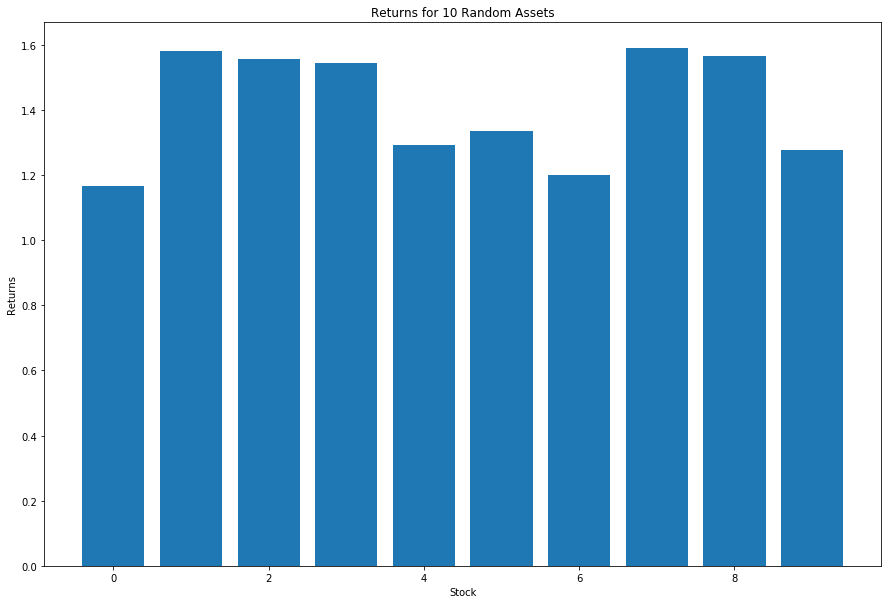

In [15]:
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i 
    # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]
plt.figure(figsize = (15, 10))
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

### Calculating Expected Return
So we have a universe of stocks. Great! Now let's put them together in a portfolio and calculate its expected return and risk.

We will start off by generating $N$ random weights for each asset in our portfolio.

In [17]:
weights = np.random.uniform(0, 1, N)
weights = weights/np.sum(weights)

We have to rescale the weights so that they all add up to $1$. We do this by scaling the weights vector by the sum total of all the weights. This step ensures that we will be using $100\%$ of the portfolio's cash.

To calculate the mean return of the portfolio, we have to scale each asset's return by its designated weight. We can pull each element of each array and multiply them individually, but it's quicker to use NumPy's linear algebra methods. The function that we want is dot(). This will calculate the dot product between two arrays for us. So if $v = \left[ 1, 2, 3 \right]$ and $w = \left[4, 5, 6 \right]$, then:

$$ v \cdot w = 1 \times 4 + 2 \times 5 + 3 \times 6 $$
For a one-dimensional vector, the dot product will multiply each element pointwise and add all the products together! In our case, we have a vector of weights, $\omega = \left[ \omega_1, \omega_2, \dots \omega_N\right]$ and a vector of returns, $\mu = \left[ \mu_1, \mu_2, \dots, \mu_N\right]$. If we take the dot product of these two we will get:

$$ \omega \cdot \mu = \omega_1\mu_1 + \omega_2\mu_2 + \dots + \omega_N\mu_N = \mu_P $$
This yields the sum of all the asset returns scaled by their respective weights. 

This the the portfolio's overall expected return!

In [18]:
p_returns = np.dot(weights, mean_returns)
print("Expected return of the portfolio: ", p_returns)

Expected return of the portfolio:  1.4464924627029558


In [19]:
v = np.array([1, 2, np.nan, 4, 5])
print(v)

ix = ~np.isnan(v) # the ~ indicates a logical not, inverting the bools
print(v[ix]) # We can also just write v = v[~np.isnan(v)]

[ 1.  2. nan  4.  5.]
[1. 2. 4. 5.]


### Conclusion
Linear algebra is pervasive in finance and in general. For example, the calculation of optimal weights according to modern portfolio theory is done using linear algebra techniques. The arrays and functions in NumPy allow us to handle these calculations in an intuitive way. For a quick intro to linear algebra and how to use NumPy to do more significant matrix calculations, proceed to the next section.

In [20]:
A = np.array([
        [1, 2, 3, 12, 6],
        [4, 5, 6, 15, 20],
        [7, 8, 9, 10, 10]        
    ])
B = np.array([
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ])

### Linear algebra
For the purpose of this section, we will be using matrix and array interchangeably.

We can express the matrix equation as:

$$ y = A\cdot x $$
Where $A$ is an $m \times n$ matrix, $y$ is a $m \times 1$ vector, and $x$ is a $n \times 1$ vector. On the right-hand side of the equation we are multiplying a matrix by a vector. This requires a little bit more clarification, lest we think that we can go about multiplying any matrices by any other matrices.

Notice that the above-defined matrices, $A$ and $B$, have different dimensions. $A$ is $3 \times 5$ and $B$ is $4 \times 3$. The general rule of what can and cannot be multiplied in which order is based on the dimensions of the matrices. Specifically, the number of columns in the matrix on the left must be equal to the number of rows in the matrix on the right. In super informal terms, let's say that we have an $m \times n$ matrix and a $p \times q$ matrix. If we multiply the first by the second on the right, we get the following:

$$ (m \times n) \cdot (p \times q) = (m \times q) $$
So the resultant product has the same number of rows as the left matrix and the same number of columns as the right matrix. This limitation of matrix multiplication with regards to dimensions is important to keep track of when writing code. To demonstrate this, we use the dot() function to multiply our matrices below:

In [21]:
print(np.dot(B, A))

[[ 34  44  54 128 124]
 [ 21  27  33  79  82]
 [ 82 101 120 227 216]
 [108 135 162 333 324]]


### Portfolio Variance
Let's return to our portfolio example from before. We calculated the expected return of the portfolio, but how do we calculate the variance? We start by trying to evaluate the portfolio as a sum of each individual asset, scaled by it's weight.

$$ VAR[P] = VAR[\omega_1 S_1 + \omega_2 S_2 + \cdots + \omega_N S_N] $$
Where $S_0, \cdots, S_N$ are the assets contained within our universe. If all of our assets were independent of each other, we could simply evaluate this as

$$ VAR[P] = VAR[\omega_1 S_1] + VAR[\omega_2 S_2] + \cdots + VAR[\omega_N S_N] = \omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + \cdots + \omega_N^2\sigma_N^2 $$
However, all of our assets depend on each other by their construction. They are all in some way related to our base asset and therefore each other. We thus have to calculate the variance of the portfolio by including the individual pairwise covariances of each asset. Our formula for the variance of the portfolio:

$$ VAR[P] = \sigma_P^2 = \sum_i \omega_i^2\sigma_i^2 + \sum_i\sum_{i\neq j} \omega_i\omega_j\sigma_i\sigma_j\rho_{i, j}, \ i, j \in \lbrace 1, 2, \cdots, N \rbrace $$
Where $\rho_{i,j}$ is the correlation between $S_i$ and $S_j$, $\rho_{i, j} = \frac{COV[S_i, S_j]}{\sigma_i\sigma_j}$. This seems exceedingly complicated, but we can easily handle all of this using NumPy arrays. First, we calculate the covariance matrix that relates all the individual stocks in our universe.

In [22]:
cov_mat = np.cov(returns)
print(cov_mat)

[[0.00098662 0.00102321 0.00092538 0.00097386 0.00094872 0.00101309
  0.00095346 0.00094142 0.00096485 0.00092006]
 [0.00102321 0.00145539 0.00100999 0.00104567 0.00093358 0.00101097
  0.00099948 0.00092272 0.0009531  0.00091247]
 [0.00092538 0.00100999 0.00119921 0.00087993 0.00087092 0.00090841
  0.00083935 0.00089109 0.0008598  0.00093186]
 [0.00097386 0.00104567 0.00087993 0.00134092 0.00088721 0.0009537
  0.00095526 0.00099071 0.00093126 0.00085886]
 [0.00094872 0.00093358 0.00087092 0.00088721 0.00132722 0.00095838
  0.00083097 0.00089928 0.00090718 0.0009226 ]
 [0.00101309 0.00101097 0.00090841 0.0009537  0.00095838 0.00142497
  0.000935   0.00095549 0.0009762  0.00096944]
 [0.00095346 0.00099948 0.00083935 0.00095526 0.00083097 0.000935
  0.00134245 0.00097101 0.0008835  0.00089405]
 [0.00094142 0.00092272 0.00089109 0.00099071 0.00089928 0.00095549
  0.00097101 0.00129441 0.0008603  0.00093501]
 [0.00096485 0.0009531  0.0008598  0.00093126 0.00090718 0.0009762
  0.0008835  0.0

This array is not formatted particularly nicely, but a covariance matrix is a very important concept. The covariance matrix is of the form:

$$ \left[\begin{matrix}
VAR[S_1] &amp; COV[S_1, S_2] &amp; \cdots &amp; COV[S_1, S_N] \\
COV[S_2, S_1] &amp; VAR[S_2] &amp; \cdots &amp; COV[S_2, S_N] \\
\vdots &amp; \vdots &amp; \ddots &amp; \vdots \\
COV[S_N, S_1] &amp; COV[S_N, S_2] &amp; \cdots &amp; VAR[S_N]
\end{matrix}\right] $$
So each diagonal entry is the variance of that asset at that index and each off-diagonal holds the covariance of two assets indexed by the column and row number. What is important is that once we have the covariance matrix we are able to do some very quick linear algebra to calculate the variance of the overall portfolio. We can represent the variance of the portfolio in array form as:

$$ \sigma_p^2 = \omega \ C \ \omega^\intercal$$
Where $C$ is the covariance matrix of all the assets and $\omega$ is the array containing the weights of each individual asset. The superscript $\intercal$ on the second $\omega$ listed above denotes the transpose of $\omega$. 

In [24]:
A

array([[ 1,  2,  3, 12,  6],
       [ 4,  5,  6, 15, 20],
       [ 7,  8,  9, 10, 10]])

In [23]:
np.transpose(A)

array([[ 1,  4,  7],
       [ 2,  5,  8],
       [ 3,  6,  9],
       [12, 15, 10],
       [ 6, 20, 10]])

But $\omega$ here is a 1-dimensional array, a vector! It makes perfect to take the transpose of $A$, a $3 \times 5$ array, as the output will be a $5 \times 3$ array, but a 1-dimensional array is not quite as intuitive. A typical 1-dimensional array can be thought of as a $1 \times n$ horizontal vector. Thus, taking the tranpose of this array essentially means changing it into a $n \times 1$ vertical vector. This makes sense because 1-dimensional arrays are still arrays and any multiplication done between 1-dimensional and higher dimensional arrays must keep in line with our dimensionality issue of matrix multiplication.

To make a long story short, we think of $\omega$ as $1 \times N$ since we have $N$ securities. This makes it so that $\omega^\intercal$ is $N \times 1$. Again, our covariance matrix is $N \times N$. So the overall multiplication works out like so, in informal terms:

$$ \text{Dimensions}(\sigma_p^2) = \text{Dimensions}(\omega C \omega^\intercal) = (1 \times N)\cdot (N \times N)\cdot (N \times 1) = (1 \times 1)$$
Multiplying the covariance matrix on the left by the plain horizontal vector and on the right by that vector's transpose results in the calculation of a single scalar ($1 \times 1$) value, our portfolio's variance.

So knowing this, let's proceed and calculate the portfolio variance! We can easily calculate the product of these arrays by using dot() for matrix multiplication, though this time we have to do it twice.

In [26]:
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print("Portfolio volatility: ", vol_p)

Portfolio volatility:  0.03141337939104104


In [27]:
# Confirming calculation
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print("Portfolio volatility: ", vol_p_alt)

Portfolio volatility:  0.03141337939104103


The ddof parameter is a simple integer input that tells the function the number of degrees of freedom to take into account. This is a more statistical concept, but what this tells us that our matrix calculation is correct!